# Multiple Linear Regression in Statsmodels - Lab

## Introduction
In this lab, you'll practice fitting a multiple linear regression model on the Ames Housing dataset!

## Objectives
You will be able to:
* Determine if it is necessary to perform normalization/standardization for a specific model or set of data
* Use standardization/normalization on features of a dataset
* Identify if it is necessary to perform log transformations on a set of features
* Perform log transformations on different features of a dataset
* Use statsmodels to fit a multiple linear regression model
* Evaluate a linear regression model by using statistical performance metrics pertaining to overall model and specific parameters


## The Ames Housing Data

Using the specified continuous and categorical features, preprocess your data to prepare for modeling:
* Split off and one hot encode the categorical features of interest
* Log and scale the selected continuous features

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns

ames = pd.read_csv('ames.csv',index_col=None,encoding='latin-1')

continuous = ['LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']
categoricals = ['BldgType', 'KitchenQual', 'SaleType', 'MSZoning', 'Street', 'Neighborhood']


## Continuous Features

In [2]:
# Log transform and normalize
ames_continuous = ames.loc[:,continuous]
print('before log transform\n',ames_continuous,'\n')
ames_continuous_log = np.log(ames_continuous)
ames_continuous_log.columns = list(f'{col}_log' for col in ames_continuous_log)
print('after log transform\n',ames_continuous_log,'\n')

before log transform
       LotArea  1stFlrSF  GrLivArea  SalePrice
0        8450       856       1710     208500
1        9600      1262       1262     181500
2       11250       920       1786     223500
3        9550       961       1717     140000
4       14260      1145       2198     250000
...       ...       ...        ...        ...
1455     7917       953       1647     175000
1456    13175      2073       2073     210000
1457     9042      1188       2340     266500
1458     9717      1078       1078     142125
1459     9937      1256       1256     147500

[1460 rows x 4 columns] 

after log transform
       LotArea_log  1stFlrSF_log  GrLivArea_log  SalePrice_log
0        9.041922      6.752270       7.444249      12.247694
1        9.169518      7.140453       7.140453      12.109011
2        9.328123      6.824374       7.487734      12.317167
3        9.164296      6.867974       7.448334      11.849398
4        9.565214      7.043160       7.695303      12.429216
...   

In [3]:
def normalization_scaling(feature):
    return (feature - np.mean(feature)) / np.std(feature)

In [4]:
print('before nomalized \n',ames_continuous_log,'\n')
ames_continuous_log_scaled = ames_continuous_log.apply(normalization_scaling)
print('after nomalized \n',ames_continuous_log_scaled,'\n')

before nomalized 
       LotArea_log  1stFlrSF_log  GrLivArea_log  SalePrice_log
0        9.041922      6.752270       7.444249      12.247694
1        9.169518      7.140453       7.140453      12.109011
2        9.328123      6.824374       7.487734      12.317167
3        9.164296      6.867974       7.448334      11.849398
4        9.565214      7.043160       7.695303      12.429216
...           ...           ...            ...            ...
1455     8.976768      6.859615       7.406711      12.072541
1456     9.486076      7.636752       7.636752      12.254863
1457     9.109636      7.080026       7.757906      12.493130
1458     9.181632      6.982863       6.982863      11.864462
1459     9.204020      7.135687       7.135687      11.901583

[1460 rows x 4 columns] 

after nomalized 
       LotArea_log  1stFlrSF_log  GrLivArea_log  SalePrice_log
0       -0.133231     -0.803570       0.529260       0.560068
1        0.113442      0.418585      -0.381846       0.212764
2     

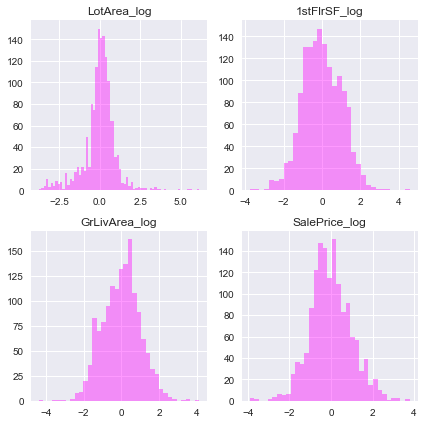

In [5]:
fig1, axes = plt.subplots(nrows=ames_continuous_log_scaled.shape[1] // 2, ncols=2, figsize=(6,6))
for xcol, ax in zip(ames_continuous_log_scaled.columns, axes.flatten()):
    ax.hist(ames_continuous_log_scaled[xcol], bins='auto', alpha=0.4, color='magenta')
    ax.set_title(xcol)

fig1.tight_layout()

## Categorical Features

In [6]:
# One hot encode categoricals
ames_categorial = pd.get_dummies(ames.loc[:,categoricals], prefix=categoricals, drop_first=True)
ames_categorial.head()

,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,SaleType_CWD,SaleType_Con,SaleType_ConLD,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


## Combine Categorical and Continuous Features

In [7]:
# combine features into a single dataframe called preprocessed
ames_preprocessed = pd.concat([ames_continuous_log_scaled,ames_categorial],axis=1)
ames_preprocessed.head()

,LotArea_log,1stFlrSF_log,GrLivArea_log,SalePrice_log,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,KitchenQual_Fa,KitchenQual_Gd,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,-0.133231,-0.803570,0.529260,0.560068,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0.113442,0.418585,-0.381846,0.212764,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0.420061,-0.576560,0.659675,0.734046,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0.103347,-0.439287,0.541511,-0.437382,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0.878409,0.112267,1.282191,1.014651,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0


## Run a linear model with SalePrice as the target variable in statsmodels

In [8]:
# Your code here
X = ames_preprocessed.drop('SalePrice_log', axis=1)
Y = ames_preprocessed.SalePrice_log
print(X.head(),'\n')
print(Y.head())

   LotArea_log  1stFlrSF_log  GrLivArea_log  BldgType_2fmCon  BldgType_Duplex  \
0    -0.133231     -0.803570       0.529260                0                0   
1     0.113442      0.418585      -0.381846                0                0   
2     0.420061     -0.576560       0.659675                0                0   
3     0.103347     -0.439287       0.541511                0                0   
4     0.878409      0.112267       1.282191                0                0   

   BldgType_Twnhs  BldgType_TwnhsE  KitchenQual_Fa  KitchenQual_Gd  \
0               0                0               0               1   
1               0                0               0               0   
2               0                0               0               1   
3               0                0               0               1   
4               0                0               0               1   

   KitchenQual_TA  ...  Neighborhood_NoRidge  Neighborhood_NridgHt  \
0               0  ...

In [9]:
X_int = sm.add_constant(X)
model = sm.OLS(Y,X_int).fit()
model.summary()

C:\Users\renjm\Anaconda3\envs\learn-env\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          SalePrice_log   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     156.5
Date:                Tue, 07 Jul 2020   Prob (F-statistic):               0.00
Time:                        19:20:10   Log-Likelihood:                -738.64
No. Observations:                1460   AIC:                             1573.
Df Residuals:                    1412   BIC:                             1827.
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1317      0.263     -0.500      0.617      -0.648       0.385
LotArea_log              0.1033      0.019      5.475      0.000       0.066       0.140
1stFlrSF_log             0.1371      0.016      8.584      0.000       0.106       0.168
GrLivArea_log            0.3768      0.016     24.114      0.000       0.346       0.407
BldgType_2fmCon         -0.1715      0.079     -2.173      0.030      -0.326      -0.017
BldgType_Duplex         -0.4205      0.062     -6.813      0.000      -0.542      -0.299
BldgType_Twnhs          -0.1404      0.093     -1.513      0.130      -0.322       0.042
BldgType_TwnhsE         -0.0512      0.060     -0.858      0.391      -0.168       0.066
KitchenQual_Fa          -1.0002      0.088    -11.315      0.000      -1.174      -0.827
KitchenQual_Gd          -0.3822      0.050     -7.613      0.000      -0.481      -0.284
KitchenQual_TA          -0.6695      0.055    -12.111      0.000      -0.778      -0.561
SaleType_CWD             0.2286      0.215      1.061      0.289      -0.194       0.651
SaleType_Con             0.5863      0.304      1.927      0.054      -0.010       1.183
SaleType_ConLD           0.3152      0.155      2.029      0.043       0.010       0.620
SaleType_ConLI           0.0331      0.195      0.169      0.865      -0.350       0.416
SaleType_ConLw           0.0161      0.196      0.082      0.935      -0.368       0.400
SaleType_New             0.3000      0.079      3.803      0.000       0.145       0.455
SaleType_Oth             0.1179      0.246      0.480      0.631      -0.364       0.599
SaleType_WD              0.1749      0.065      2.676      0.008       0.047       0.303
MSZoning_FV              1.0670      0.193      5.526      0.000       0.688       1.446
MSZoning_RH              0.8771      0.194      4.512      0.000       0.496       1.258
MSZoning_RL              0.9964      0.162      6.151      0.000       0.679       1.314
MSZoning_RM              1.1027      0.152      7.264      0.000       0.805       1.400
Street_Pave             -0.2132      0.180     -1.182      0.237      -0.567       0.141
Neighborhood_Blueste     0.0530      0.318      0.167      0.868      -0.571       0.677
Neighborhood_BrDale     -0.4629      0.171     -2.711      0.007      -0.798      -0.128
Neighborhood_BrkSide    -0.6500      0.137     -4.735      0.000      -0.919      -0.381
Neighborhood_ClearCr    -0.2103      0.144     -1.456      0.146      -0.494       0.073
Neighborhood_CollgCr    -0.0761      0.119     -0.641      0.522      -0.309       0.157
Neighborhood_Crawfor    -0.0824      0.129     -0.638      0.523      -0.336       0.171
Neighborhood_Edwards    -0.7615      0.124     -6.143      0.000      -1.005      -0.518
Neighborhood_Gilbert    -0.0980      0.126     -0.777    

## Run the same model in scikit-learn

In [11]:
# Your code here - Check that the coefficients and intercept are the same as those from Statsmodels
linreg = LinearRegression()
linreg.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
# coefficients
linreg.coef_

array([ 0.10327192,  0.1371289 ,  0.37682133, -0.17152105, -0.42048287,
       -0.14038921, -0.05121949, -1.00020261, -0.38215288, -0.6694784 ,
        0.22855565,  0.58627941,  0.31521364,  0.03310544,  0.01609215,
        0.29995612,  0.1178827 ,  0.17486316,  1.06700108,  0.8771105 ,
        0.99643261,  1.10266268, -0.21318409,  0.0529509 , -0.46287108,
       -0.65004527, -0.21026441, -0.0761186 , -0.08236455, -0.76152767,
       -0.09803299, -0.96216285, -0.6920628 , -0.25540919, -0.4408245 ,
       -0.01595592, -0.26772132,  0.36325607,  0.36272091, -0.93537011,
       -0.70000301, -0.47559431, -0.23317719,  0.09506225,  0.42971796,
        0.00569435,  0.12766986])

In [13]:
# intercept
linreg.intercept_

-0.1317424941874444

## Predict the house price given the following characteristics (before manipulation!!)

Make sure to transform your variables as needed!

- LotArea: 14977
- 1stFlrSF: 1976
- GrLivArea: 1976
- BldgType: 1Fam
- KitchenQual: Gd
- SaleType: New
- MSZoning: RL
- Street: Pave
- Neighborhood: NridgHt

## Summary
Congratulations! You pre-processed the Ames Housing data using scaling and standardization. You also fitted your first multiple linear regression model on the Ames Housing data using statsmodels and scikit-learn!